In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston_df = pd.read_csv("boston_housing.csv")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


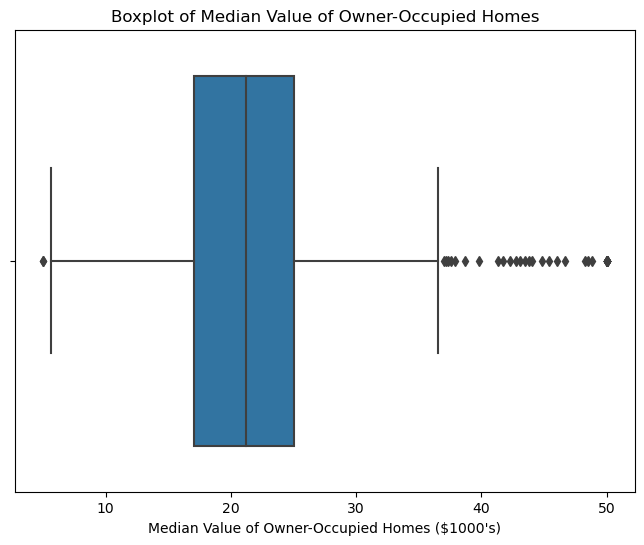

In [5]:
plt.figure(figsize = (8,6))
sns.boxplot(x = boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000\'s)')
plt.ylabel('')
plt.show()

The above boxplot interpets that the IQR of MEDV is about 7. The 25th quartile is about 17 and 75th quartile is about 25. Whiskers leading to minimum value us about 5 and reaching to maximum value that is somewhat around 36. Individual data points outside the whiskers' range are shown as diamonds. These data points are potential extreme values that deviate significantly from the majority of the data.

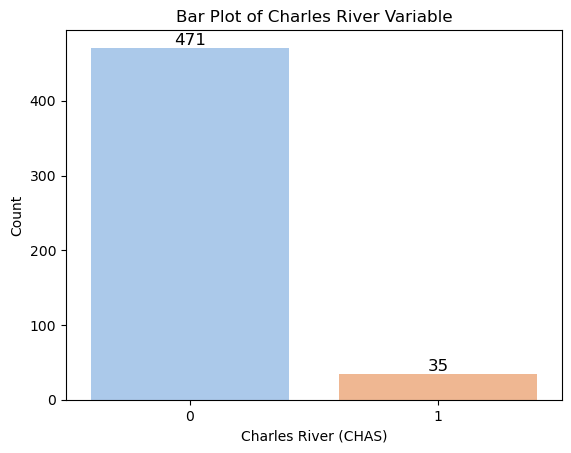

In [6]:
ax = sns.countplot(x=boston_df['CHAS'], palette='pastel')
plt.xlabel('Charles River (CHAS)')
plt.ylabel('Count')
plt.title('Bar Plot of Charles River Variable')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

The count of 471 for category 1 suggests that the majority of the data points in the dataset correspond to areas that are adjacent to the Charles River. On the other hand, the count of 35 for category 0 indicates that there are relatively fewer data points corresponding to areas that are not adjacent to the Charles River.

This information could be valuable in understanding the distribution of properties or locations in the dataset concerning their proximity to the Charles River. The "Charles River" variable can be considered a binary feature, where category 1 represents river-bound tracts, and category 0 represents non-river-bound tracts. Analyzing this variable can help assess the influence of the river's proximity on other housing or environmental factors in the dataset.

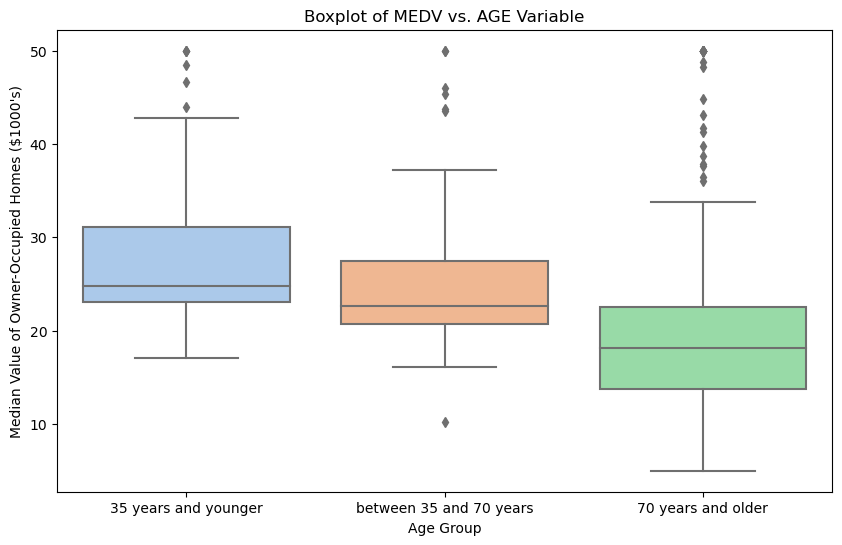

In [7]:
# Discretize the "AGE" variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='pastel')
# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000\'s)')
plt.title('Boxplot of MEDV vs. AGE Variable')
# Show the plot
plt.show()

The central horizontal line within each box represents the median value of "MEDV" for each age group. By comparing the medians across age groups, we can observe any differences in the median home values for properties of different ages.
The height of each box indicates the spread or variability of "MEDV" values within each age group. A taller box suggests higher variability in home values within 35 years and younger age group, while a shorter box indicates relatively less variability in 70 years and older age group.
The boxplot may display individual data points beyond the whiskers, indicating potential outliers. Outliers are properties whose median values significantly deviate from the majority of properties in their respective age groups. These outliers could be interesting for further investigation.
The boxplot allows for easy visual comparisons between the three age groups. We can observe how the distribution of "MEDV" varies among the "35 years and younger," "between 35 and 70 years," and "70 years and older" age groups.
Overall, the boxplot provides a comprehensive visual summary of how the median values of owner-occupied homes vary across different age groups. It enables us to explore the relationship between property age and median values, identify potential patterns or outliers, and gain a better understanding of the housing market dynamics related to age.

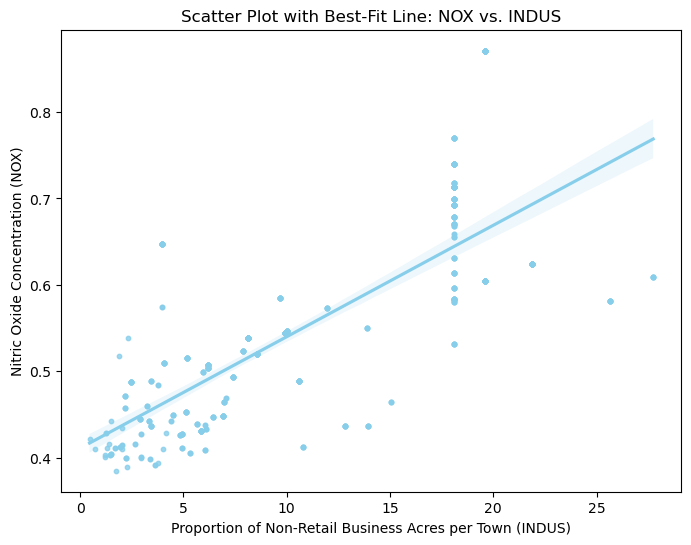

In [8]:
# Create the scatter plot with the best-fit line
plt.figure(figsize=(8, 6))
sns.regplot(x='INDUS', y='NOX', data=boston_df, color='skyblue', scatter_kws={'s': 10})

# Add labels and title
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.title('Scatter Plot with Best-Fit Line: NOX vs. INDUS')

# Show the plot
plt.show()

The scatter plots show the possible linear relationship between the 'NOX' and 'INDUS'. The concentration of points in the plot and their proximity to a potential line of best fit indicate the strength of the relationship. A dense, tight cluster of points suggests a stronger relationship between the variables. In this case we can see the linearity but the dense tight cluster of data points along the best fit line is not as much stronger to make a strong relationship between the variables. Following are main points from this graph,

There appears to be a general positive trend between "NOX" and "INDUS," suggesting that as the proportion of non-retail business acres per town (INDUS) increases, the nitric oxide concentration (NOX) tends to increase as well.

The points are relatively spread out, indicating some variability in "NOX" for different levels of "INDUS."

There might be a potential linear correlation between "NOX" and "INDUS," as the points show a tendency to follow a diagonal pattern.

There are a few points on the right side of the plot (higher "INDUS" values) that seem to be slightly distant from the main pattern, which could be outliers.

Overall, the scatter plot suggests a positive relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. However, to confirm the strength and significance of this relationship, you can calculate the correlation coefficient and perform further statistical analysis if required.

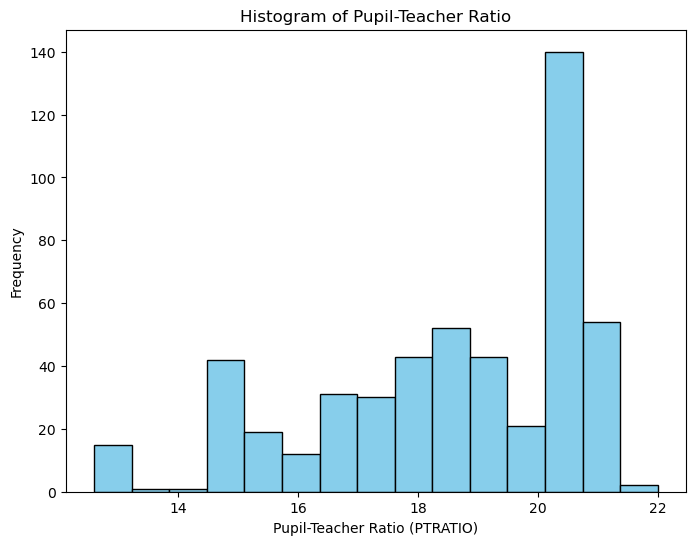

In [9]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil-Teacher Ratio')

# Show the plot
plt.show()

The x-axis represents the range of pupil-to-teacher ratios in the dataset. Each bin on the x-axis corresponds to a specific range of PTRATIO values. The y-axis shows the frequency of occurrence (i.e., the number of data points) for each bin. It represents how many schools in the dataset fall within each pupil-to-teacher ratio range. The histogram is skewed to the left (negatively skewed), it indicates that most schools have lower PTRATIO values, meaning there are fewer pupils per teacher.
The peak of the histogram (bin with the highest frequency) indicates the most common pupil-to-teacher ratio in the dataset. The spread of the histogram shows the variation in PTRATIO values. 

## Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

H0: There is no significant difference in the median values of houses bounded by the Charles River and not bounded by the Charles River.

Ha: There is a significant difference in the median values of houses bounded by the Charles River and not bounded by the Charles River.
Statistical Test: Two-sample independent t-test.

In [10]:
# Separate the MEDV values for houses bounded and not bounded by the Charles River
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(bounded_by_river, not_bounded_by_river)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in the median values of houses bounded by the Charles River and not bounded by the Charles River. We can reject the null hypothesis as there is not enough evidence to prove this.")
else:
    print("There is no significant difference in the median values of houses bounded by the Charles River and not bounded by the Charles River.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median values of houses bounded by the Charles River and not bounded by the Charles River. We can reject the null hypothesis as there is not enough evidence to prove this.


## Question 2: Is there a difference in median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

H0: There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE).

Ha: There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE).

In [11]:
model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model)

# Print the results
print(anova_table)

# Conclusion
if anova_table['PR(>F)'][0] < 0.05:
    print("There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE).")
else:
    print("There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE).")

             df        sum_sq   mean_sq         F   PR(>F)
C(AGE)    355.0  29884.038419  84.18039  0.984009  0.55397
Residual  150.0  12832.256996  85.54838       NaN      NaN
There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE).


## Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

H0: There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

Ha: There is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [12]:
# Perform Pearson correlation
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")

Correlation coefficient: 0.763651446920915
P-value: 7.913361061239593e-98
There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


## Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression Analysis)

Hypothesis:

H0: There is no relationship between the weighted distance to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).

Ha: There is a relationship between the weighted distance to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).

In [13]:
# Prepare the data
X = sm.add_constant(boston_df['DIS'])  # Add a constant term for the intercept
y = boston_df['MEDV']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Conclusion
if model.pvalues[1] < 0.05:
    print("There is a significant relationship between the weighted distance to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).")
else:
    print("There is no significant relationship between the weighted distance to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        20:21:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0